Initial Setup

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [7]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:09<00:00, 71.4MB/s]
100% 1.06G/1.06G [00:09<00:00, 115MB/s] 


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [17]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [10]:
# Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels= "inferred",
    label_mode= "int",
    batch_size = 32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels= "inferred",
    label_mode= "int",
    batch_size = 32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [11]:
# Normalize
def process(image, label):
  image = tf.cast(image/255., tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [18]:
# create CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(train_ds, epochs= 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 108ms/step - loss: 1.1147 - accuracy: 0.5799 - val_loss: 0.9229 - val_accuracy: 0.5216
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5787 - accuracy: 0.7018 - val_loss: 0.5579 - val_accuracy: 0.7286
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4928 - accuracy: 0.7685 - val_loss: 0.5217 - val_accuracy: 0.7660
Epoch 4/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4271 - accuracy: 0.8055 - val_loss: 0.4974 - val_accuracy: 0.7564
Epoch 5/10
625/625 [==============================] - 64s 103ms/step - loss: 0.3532 - accuracy: 0.8464 - val_loss: 0.4757 - val_accuracy: 0.7870
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2886 - accuracy: 0.8736 - val_loss: 0.5565 - val_accuracy: 0.8004
Epoch 7/10
625/625 [==============================] - 67s 106ms/step - loss: 0.2128 - accuracy: 0.9140 - val_loss: 0.4329 - val_ac

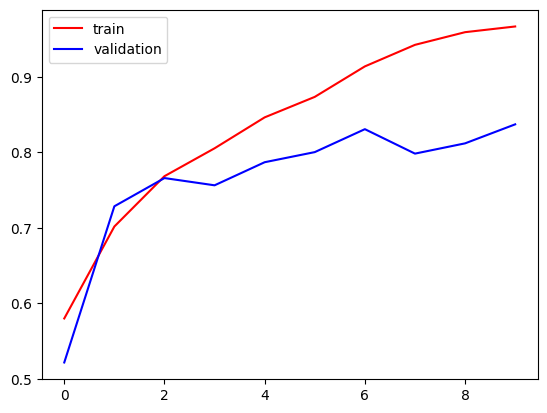

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

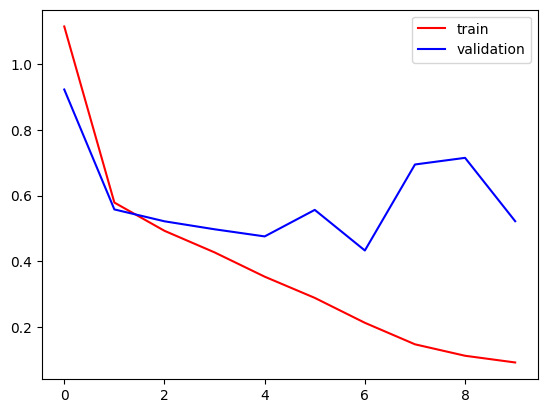

In [23]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

Tesing Result


In [24]:
import cv2


In [33]:
test_img=cv2.imread('/content/cat2.jpg')

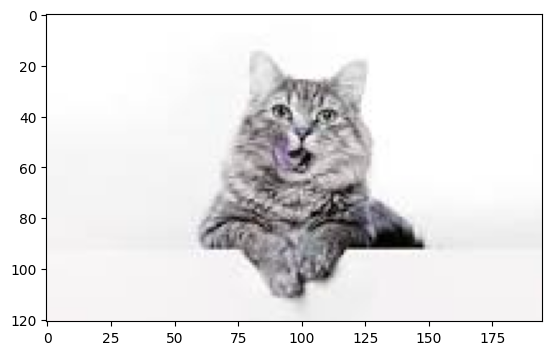

In [34]:
plt.imshow(test_img)

In [35]:
test_img.shape

(121, 195, 3)

In [36]:
test_img = cv2.resize(test_img,(256,256))

In [37]:
test_input = test_img.reshape((1,256,256,3))

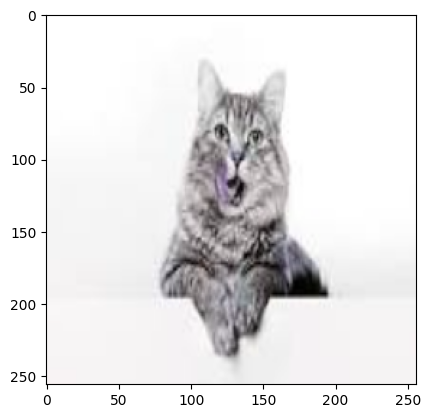

In [38]:
plt.imshow(test_img)

In [39]:
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[0.]], dtype=float32)